# Задание 1

### Метод Гаусса

In [1]:
import matplotlib.pyplot as plt


def calculate_by_gauss_method(A, b):
    cur_A = numpy.hstack((A, b))
    temp = [numpy.hstack((A[0, :] / A[0, 0], b[0] / A[0, 0]))]

    # straight move
    for counter in range(cur_A.shape[0]):
        if cur_A.shape[0] <= 1:
            break

        next_A = numpy.empty((cur_A.shape[0] - 1, cur_A.shape[1] - 1))

        for i in range(1, cur_A.shape[0]):
            for j in range(1, cur_A.shape[1]):
                next_A[i - 1, j - 1] = cur_A[i, j] - cur_A[i, 0] * temp[counter][j]

        temp.append(numpy.array(next_A[0, :] / next_A[0, 0]))
        cur_A = next_A

    # reverse move
    size = A.shape[0]
    x = numpy.empty(size)
    x[size - 1] = temp[size - 1][1]

    for i in range(size - 2, -1, -1):
        x[i] = temp[i][len(temp[i]) - 1]
        k = size - 1
        for j in range(temp[i].size - 2, 0, -1):
            x[i] -= temp[i][j] * x[k]
            k -= 1

    return x

### Метод Гаусса-Жордано

In [2]:
def calculate_by_gauss_jordano_method(A, b):
    cur_A = numpy.hstack((A, b))
    temp = [numpy.hstack((A[0, :] / A[0, 0], b[0] / A[0, 0]))]

    # straight move
    for counter in range(cur_A.shape[0]):
        if cur_A.shape[0] <= 1:
            break

        next_A = numpy.empty((cur_A.shape[0] - 1, cur_A.shape[1] - 1))

        for i in range(1, cur_A.shape[0]):
            for j in range(1, cur_A.shape[1]):
                next_A[i - 1, j - 1] = cur_A[i, j] - cur_A[i, 0] * temp[counter][j]

        temp.append(numpy.array(next_A[0, :] / next_A[0, 0]))
        cur_A = next_A

    # reverse move
    for i in range(len(temp) - 1, 0, -1):  # row
        p = 1
        for j in range(i - 1, -1, -1):  # row
            elem = temp[j][temp[j].size - len(temp[i])]
            # print(elem)
            for k in range(temp[i].size):
                temp[j][k + p] -= temp[i][k] * elem
            p += 1

    x = numpy.empty(A.shape[0])
    for i in range(len(temp)):
        x[i] = temp[i][temp[i].size - 1]

    return x

### Нахождение нормы вектора или матрицы

In [3]:
def norm(A):
    A = numpy.array(A)
    if len(A.shape) == 1:  # vector
        return max(abs(numpy.max(A)), abs(numpy.min(A)))
    if len(numpy.array(A).shape) == 2:  # matrix
        arr = []
        for i in range(A.shape[0]):
            row_sum = 0
            for j in range(A.shape[1]):
                row_sum += abs(A[i][j])
            arr.append(row_sum)

        return max(arr)
    else:
        raise TypeError("Too many dimensions")

### Метод Якоби

In [46]:
def calculate_by_jacobi_method(A, b, init_x=0, e=1e-10, max_iters=500):
    next_x = numpy.empty(A.shape[0])
    if init_x == 0:
        prev_x = numpy.zeros(A.shape[0])
    else:
        prev_x = numpy.array(init_x)

    arr_to_plot = [prev_x[0]]
    for _ in range(max_iters):
        for i in range(next_x.size):
            _sum = 0

            for j in range(A.shape[1]):
                if j != i:
                    _sum -= A[i][j] * prev_x[j]

            next_x[i] = 1 / A[i][i] * (_sum + b[i])

        arr_to_plot.append(next_x[0])
        
        if norm(next_x - prev_x) <= e:
            break
        else:
            prev_x = next_x.copy()

    plt.plot(arr_to_plot)   
    plt.title("Convergence graph for x1 in Jacobi method")
    plt.xlabel("Iterations")
    plt.ylabel("x1")
    plt.show()
    
    return next_x

### Метод Гаусса-Зейделя

In [45]:
def calculate_by_gauss_seidel_method(A, b, init_x=0, e=1e-10, max_iters=500):
    next_x = numpy.empty(A.shape[0])
    if init_x == 0:
        prev_x = numpy.zeros(A.shape[0])
    else:
        prev_x = numpy.array(init_x)

    arr_to_plot = [prev_x[0]]
    for _ in range(max_iters):
        for i in range(next_x.size):
            sum_1 = 0
            for j in range(i):
                sum_1 -= A[i][j] * next_x[j]

            sum_2 = 0
            for j in range(i + 1, A.shape[1]):
                sum_2 -= A[i][j] * prev_x[j]

            next_x[i] = 1 / A[i][i] * ((sum_1 + sum_2) + b[i])

        arr_to_plot.append(next_x[0])
        if norm(next_x - prev_x) <= e:
            break
        else:
            prev_x = next_x.copy()

    plt.plot(arr_to_plot)   
    plt.title("Convergence graph for x1 in Gauss-Seidel method")
    plt.xlabel("Iterations")
    plt.ylabel("x1")
    plt.show()
    return next_x

### Иллюстрация работы разработанных функций

Gauss method: 
[0.18519046 0.34731112 0.11429252 0.04912745]
Gauss-Jordano method: 
[0.18519046 0.34731112 0.11429252 0.04912745]


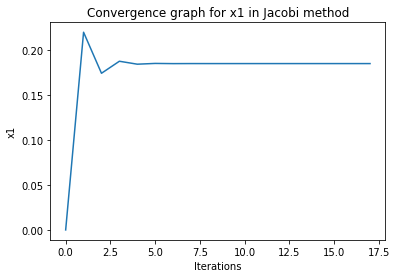

Jacobi method: 
[0.18519046 0.34731112 0.11429252 0.04912745]


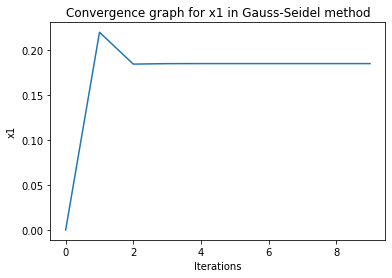

Gauss-Seidel method: 
[0.18519046 0.34731112 0.11429252 0.04912745]


In [47]:
import numpy

A = numpy.array([[2.958, 0.147, 0.354, 0.238],
                     [0.127, 2.395, 0.256, 0.273],
                     [0.403, 0.184, 3.815, 0.416],
                     [0.259, 0.361, 0.281, 3.736]])
b = numpy.array([[0.651],
                 [0.898],
                 [0.595],
                 [0.389]])

print("Gauss method: \n{}".format(calculate_by_gauss_method(A, b)))
print("Gauss-Jordano method: \n{}".format(calculate_by_gauss_jordano_method(A, b)))
print("Jacobi method: \n{}".format(calculate_by_jacobi_method(A, b)))
print("Gauss-Seidel method: \n{}".format(calculate_by_gauss_seidel_method(A, b)))

# Задание 2

### Метод сопряженных градиентов

In [29]:
def calculate_by_conjugate_gradient_method(A, b, init_x=0, e=1e-10, max_iters=500):
    x = numpy.array(init_x)
    r = numpy.array(b - numpy.dot(A, x))
    if norm(r) <= e:
        return x[:, 0]
    p = r.copy()
    arr_to_plot = [x]
    for i in range(max_iters):
        rT_and_r_dot = numpy.dot(r.T, r)
        alpha = rT_and_r_dot / numpy.dot(numpy.dot(p.T, A), p)
        x = x + alpha * p
        arr_to_plot.append(x[0][0])
        r = numpy.array(r - alpha * numpy.dot(A, p))
        if norm(r) <= e:
            break
        beta = numpy.dot(r.T, r) / rT_and_r_dot
        p = r + beta * p
        
    plt.plot(arr_to_plot)   
    plt.title("Convergence graph for x11")
    plt.xlabel("Iterations")
    plt.ylabel("x11")
    plt.show()
    
    return x[:, 0]

### Переобусловленный метод сопряженных градиентов

In [43]:
def calculate_by_preconditioned_cgm(A, b, init_x=0, e=1e-10, max_iters=500):
#     M = numpy.dot(numpy.eye(A.shape[0]), numpy.eye(A.shape[0]).T)
    M = numpy.zeros(A.shape)
    for i in range(A.shape[0]):
        M[i][i] = A[i][i]
    M = numpy.linalg.inv(M)
    x = numpy.array(init_x)
    r = numpy.array(b - numpy.dot(A, x))
    if norm(r) <= e:
        return x[:, 0]
    z = numpy.dot(M, r)
    p = z.copy()
    arr_to_plot = [x]
    for i in range(max_iters):
        rT_and_z_dot = numpy.dot(r.T, z)
        alpha = rT_and_z_dot / numpy.dot(numpy.dot(p.T, A), p)
        x = x + alpha * p
        arr_to_plot.append(x[0][0])
        r = numpy.array(r - alpha * numpy.dot(A, p))
        if norm(r) <= e:
            break
        z_old = z.copy()
        z = numpy.dot(M, r)
#         beta = numpy.dot(r.T, z) / rT_and_z_dot
        beta = numpy.dot(r.T, (z - z_old)) / rT_and_z_dot
        p = z + beta * p

    plt.plot(arr_to_plot)   
    plt.title("Convergence graph for x11")
    plt.xlabel("Iterations")
    plt.ylabel("x11")
    plt.show()
    return x[:, 0]

### Иллюстрация работы разработанных функций

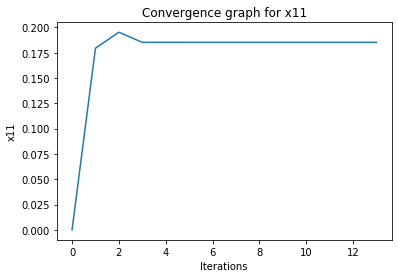

Conjugate gradient method:
Answer: [0.18519046 0.34731112 0.11429252 0.04912745]


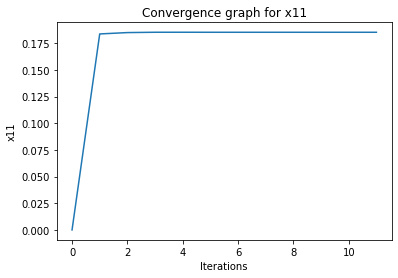

Preconditioned conjugate gradient method:
Answer: [0.18519046 0.34731112 0.11429252 0.04912745]


In [44]:
print("Conjugate gradient method:\nAnswer: {}".format(calculate_by_conjugate_gradient_method(A, b)))
print("Preconditioned conjugate gradient method:\nAnswer: {}".format(calculate_by_preconditioned_cgm(A, b)))

Вывод: скорость сходимости переобусловленного метода сопряженных градиентов очень сильно зависит от выбора матрицы M. В данном случае матрица была выбрана следующим образом:
М[i][j] = A[i][i], если i == j, иначе М[i][j] = 0.
Таким образом скорость сходимости переобусловленного метода сопряженных градиентов несколька выше скорости сходимости метода сопряженных градиентов 

# Задание 3

### Функции биномиального коэффициента и матрицы Гильберта

In [37]:
import math


def binomial_coefficient(n, k):
    return math.factorial(n) / math.factorial(n - k) / math.factorial(k)


def inv_hilbert_matrix(n, e=1e-4):
    H_inv = numpy.empty((n, n))
    for i in range(n):
        i += 1
        for j in range(n):
            j += 1
            binom_1 = binomial_coefficient(n + i - 1, n - j)
            binom_2 = binomial_coefficient(n + j - 1, n - i)
            binom_3 = binomial_coefficient(i + j - 2, i - 1) ** 2
            H_inv[i - 1][j - 1] = (i + j - 1) * binom_1 * binom_2 * binom_3 * (-1) ** (i + j)
    return H_inv


def hilbert_matrix(n, e=4):
    H = numpy.empty((n, n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1 / (i + 1 + j + 1 - 1)
    print("{} x {} Hilbert matrix:\n{}".format(n, n, H))

    H_inv = numpy.array(inv_hilbert_matrix(n, e))
    print("{} x {} Hilbert inverse matrix rounded to fourth decimal place:\n{}".format(n, n, H_inv))

    H_inv = numpy.around(numpy.linalg.inv(H_inv), e)
    print("Inverse matrix from inverse matrix rounded to fourth decimal place:\n{}".format(H_inv))

    dif_norm = norm(H - H_inv)
    print("Norm of the resulting matrices:\n{}".format(dif_norm))
    

### Иллюстрация работы разработанных функций

In [38]:
hilbert_matrix(3)

3 x 3 Hilbert matrix:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]
3 x 3 Hilbert inverse matrix rounded to fourth decimal place:
[[   9.  -36.   30.]
 [ -36.  192. -180.]
 [  30. -180.  180.]]
Inverse matrix from inverse matrix rounded to fourth decimal place:
[[1.     0.5    0.3333]
 [0.5    0.3333 0.25  ]
 [0.3333 0.25   0.2   ]]
Norm of the resulting matrices:
3.333333333332966e-05
